<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [48]:
import numpy as np
from os.path import join as pjoin
import matplotlib.pyplot as plt

Cut vector into trial snippets.

In [9]:
# load spk train data

out_dir = "output"
fname_fr = "George00_rec14_01282021-firingrates.npz"

fr = np.load(pjoin(out_dir, fname_fr))


In [103]:
# change last element to -1 (index for missing trials)
spk_fr = fr["spk_fr"]
spk_fr[-1] = -1

spk_train = fr["spk_train"]
spk_train[-1] = -1

In [106]:
# load bhv time stamps

fname_bhv = "George00_rec14_01282021-bhvtimes.npz"

bhv = np.load(pjoin(out_dir, fname_bhv))

keep_tr = bhv["ts_pics"] != -1


1257

In [83]:
# time range around cuts?
t_range = [-2, 2] # in seconds


In [84]:
# number of trials
ntr = bhv["ts_pics"].shape[0]


In [ ]:
# make time cuts for each trial

In [63]:
t_idx = np.arange(t_range[0] * 1000, t_range[1] * 1000)
nt = t_idx.shape[0]
t_tile = np.tile(t_idx.reshape(1, -1), (ntr, 1))

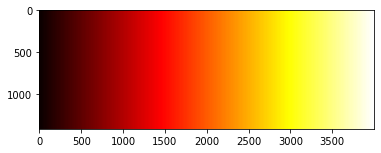

In [57]:
fig, ax = plt.subplots()
ax.imshow(t_tile, cmap="hot")

In [89]:
# make t=0 cuts for each trial
pics_t = np.round(bhv["ts_pics"] * 1000).astype(int)
pics_t[pics_t==-1000] = -1 # trials with missing event stamps = -1

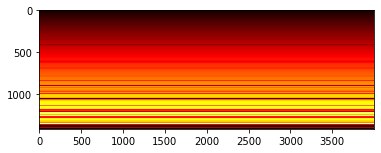

In [91]:
pics_tile = np.tile(pics_t.reshape(-1, 1), (1, nt))

fig, ax = plt.subplots()
ax.imshow(pics_tile, cmap="hot")


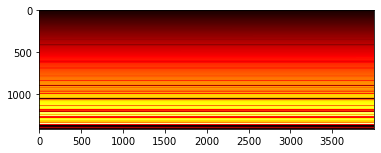

In [143]:
# combine time range with pics cut

timestamps = t_tile + pics_tile
timestamps[pics_tile==-1] = -1 # trials with missing event stamps = -1

fix, ax = plt.subplots()
ax.imshow(timestamps, cmap="hot")

Text(0, 0.5, 'firing rate (Hz)')

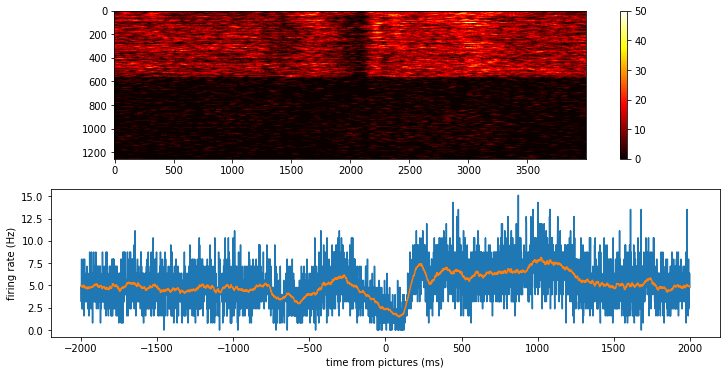

In [157]:
# let's do it with real data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(2, 1, 1)
a = ax.imshow(1000*spk_fr[timestamps][keep_tr, :], cmap="hot", vmin=0, vmax=50)
plt.colorbar(a)

ax = fig.add_subplot(2, 1, 2)
ax.plot(t_idx, 1000*np.mean(spk_train[timestamps][keep_tr, :], axis=0))
ax.plot(t_idx, 1000*np.mean(spk_fr[timestamps][keep_tr, :], axis=0))

ax.set_xlabel("time from pictures (ms)")
ax.set_ylabel("firing rate (Hz)")

In [160]:
y=ax.get_ylim()

In [161]:
y

(-0.7557677008750995, 15.871121718377088)